In [1]:
from SeismicReduction import *

In [2]:
### Client loader
set_seed(42)
dataholder = DataHolder("Glitne", [1300, 1502, 2], [1500, 2002, 2])
dataholder.add_near('./data/3d_nearstack.sgy');
dataholder.add_far('./data/3d_farstack.sgy');
dataholder.add_horizon('./data/Top_Heimdal_subset.txt')
dataholder.add_well('well_1', 36, 276//2)

SegyPY0.57:  readSegy : Trying to read ./data/3d_nearstack.sgy
SegyPY0.57:  getSegyHeader : succesfully read ./data/3d_nearstack.sgy
SegyPY0.57:  filesize=31438840
SegyPY0.57:  bps=    4
SegyPY0.57:  nd=7858810
SegyPY0.57:  readSegyData : Reading segy data
SegyPY0.57:  readSegyData : SEG-Y revision = 0
SegyPY0.57:  readSegyData : DataSampleFormat=1(IBM Float)
SegyPY0.57:   ns=250
SegyPY0.57:  readSegyData : Finished reading segy data
SegyPY0.57:  readSegy : Trying to read ./data/3d_farstack.sgy
SegyPY0.57:  getSegyHeader : succesfully read ./data/3d_farstack.sgy
SegyPY0.57:  filesize=31438840
SegyPY0.57:  bps=    4
SegyPY0.57:  nd=7858810
SegyPY0.57:  readSegyData : Reading segy data
SegyPY0.57:  readSegyData : SEG-Y revision = 0
SegyPY0.57:  readSegyData : DataSampleFormat=1(IBM Float)
SegyPY0.57:   ns=250
SegyPY0.57:  readSegyData : Finished reading segy data


In [3]:
### Processor
processor = Processor(dataholder)
input1 = processor([True, 24, 24], normalise=True)

Processor has created an output with shape:  (25351, 2, 48)


In [4]:
## PCA
# pca = PcaModel(input1)
# pca.reduce(3)
# pca.to_2d(umap_neighbours=5, umap_dist=0.1, verbose=False)

In [5]:
# umap = UmapModel(input1)
# umap.reduce()
# umap.to_2d(10, 0.1)

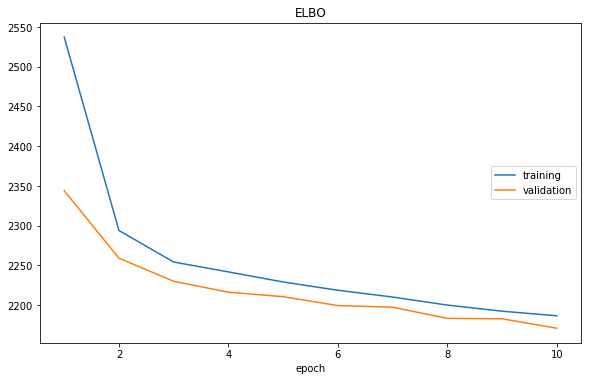

ELBO:
training   (min: 2186.542, max: 2537.399, cur: 2186.542)
validation (min: 2170.866, max: 2343.956, cur: 2170.866)
NOTE: embedding already reduced to 2D latent space, UMAP will not be run


In [6]:
vae = VaeModel(input1)
vae.reduce(epochs=10, hidden_size=2, lr=0.001, plot_loss=False)
vae.to_2d(20, 0.1)

In [9]:
# bvae = BVaeModel(input1)
# bvae.reduce(epochs=10, hidden_size=2, lr=0.01, beta=5, plot_loss=True)
# bvae.to_2d(20, 0.1)

In [10]:
# plot_agent(pca, 'horizon')

In [11]:
# plot_agent(umap)

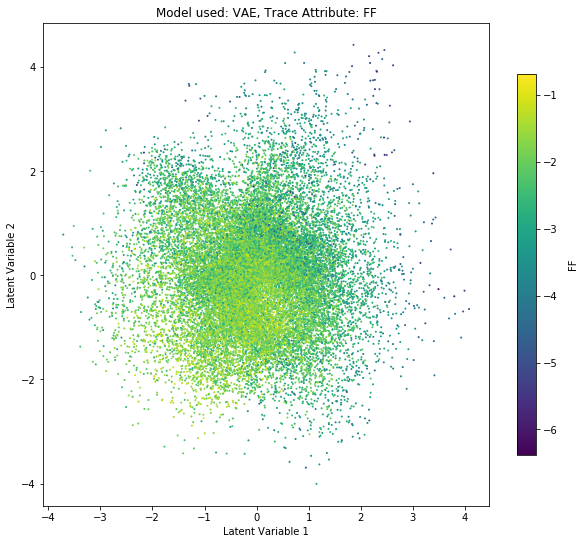

In [12]:
plot_agent(vae)

In [ ]:
# plot_agent(bvae, 'horizon')

In [16]:
vae.save_nn('./saved_nn/vae1')

In [19]:
loaded = VaeModel(input1)
loaded.load_nn('./saved_nn/vae1')
loaded.reduce()

ModelAgent initialised


In [20]:
loaded.to_2d()

NOTE: embedding already reduced to 2D latent space, UMAP will not be run


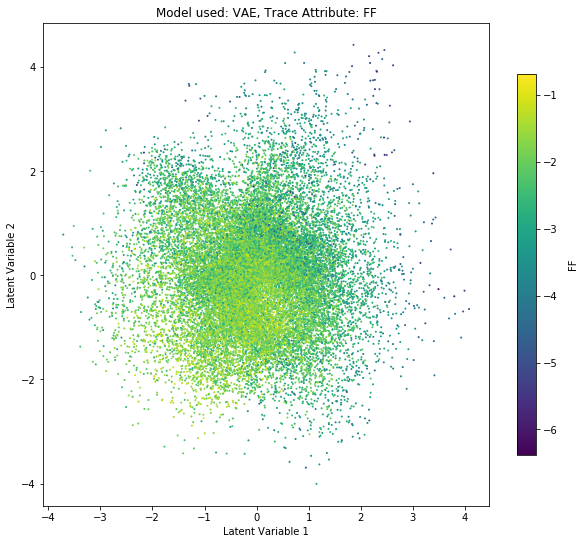

In [21]:
plot_agent(loaded)